### 【問題1】仮定関数
### 【問題2】最急降下法
### 【問題3】推定
### 【問題4】平均二乗誤差
### 【問題5】目的関数
### 【問題6】学習と推定
### 【問題7】学習曲線のプロット

切片: 4.196296296296298
傾き: 0.13468013468013465


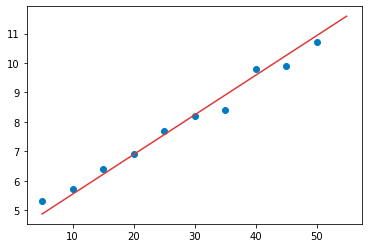

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

weights = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
lengths = np.array([5.3, 5.7, 6.4, 6.9, 7.7, 8.2, 8.4, 9.8, 9.9, 10.7])

def least_squares(x, y):
    """回帰係数を計算する"""
    theta_1 = np.cov(x, y)[0][1] / np.var(x)
    theta_0 = np.mean(y) - theta_1 * np.mean(x)
    return theta_0, theta_1


theta_0, theta_1 = least_squares(weights, lengths)

print(f'切片: {theta_0}')
print(f'傾き: {theta_1}')


x = np.arange(5, 55, 0.1)
y = theta_0 + theta_1 * x  # 回帰曲線
# 可視化
plt.scatter(weights, lengths, c='#007bc3')
plt.plot(x, y, c='#de3838')
plt.show()